# Projet 2 - Compte Rendu
# Évolution thermique d'un corps céleste

Auteurs : Alexandre Bougakov et Christophe Martini

Projet mené durant le mois de mars 2021 sous la supervision de Nicolas Rambaux

## Introduction
### Transfert de Chaleur

La temperature est un paramètre deterministe pour l'évolution de la structure interne d'une planète. Ainsi, dans l'objectif de se renseigner sur la possible structure interne d'une planète, il est essenciel de connaître son profil de temppérature au cours du temps. L'analyse de l'évolution thermique dans le corps d'une planète tellurique revient à connaître le comportement de son mécanisme de transfert de chaleur. Dans ce cadre, les effets de transfert radiatif et convectif peuvent être négligés.

Le transfert de chaleur est déterminé par le principe de conservation de l'énergie, il faut alors définir les termes énergétiques du système pour après arriver à l'équation du tranfert de chaleur. Désormais on peut écrire l'énergie totale par unité de volume $E$ sous la forme :

\begin{equation}
E=E_c+E_{int},
\tag{1}
\label{eq:energie1}
\end{equation}

où $E_c$ et $E_{int}$ sont, respectivement, l'énergie cinétique et l'énergie interne spécifique. Maintenant, comme le milieu n'est pas uniforme on doit intégrer sur le volume tout en multipliant par la densité $\rho$, et on obtient donc l'expression intégrale de l'énergie :

\begin{equation}
E=\int_\nu\rho \left(\frac{1}{2}\left\|\overrightarrow{V}\right\|^2+\overline{E}_{int}\right)d\nu,
\tag{2}
\label{eq:energie2}
\end{equation}

tel que $\overrightarrow{V}$ est la vitesse et $\overline{E}_{int}$ dénote l'énergie interne spécifique.
Ainsi, en appliquant la première loi de la thermodynamique, il est possible d'exprimer le changement temporel de l'énergie comme la différence entre le transfert de chaleur $\overrightarrow{q}$ et le travail exercé par le système, donc on peut écrire :

\begin{equation}
\frac{DE}{Dt}=-\oint_S\overrightarrow{q}\cdot d\overrightarrow{S}+\oint_S\overrightarrow{V}\cdot\mathscr{T}_sdS+\oint_\nu\rho\overrightarrow{V}\cdot\overrightarrow{F}d\nu,
\tag{3}
\label{eq:energie3}
\end{equation}

où $S$ est la surface du système, $\mathscr{T}_s$ le tenseur d'efforts de surface (dans ce cas un vecteur) et $\overrightarrow{F}$ les forces qui agissent sur le corps du système. Dans ce cadre, l'énergie totale dépend de l'échange de chaleur entre le système et ses environs ainsi que, du travail qui se décompose en un travail effectué par les efforts de surface et un autre exercé par les forces externes. Pour continuer, le théorème de la divergence de Gauss nous donne la forme différentielle de l'équation \eqref{eq:energie3} :

\begin{equation}
\rho\frac{D}{Dt}\left(\overline{E}_{int}+\frac{1}{2}\left\|\overrightarrow{V}\right\|^2\right)=\nabla\cdot\left(\mathscr{T}\cdot\overrightarrow{V}-\overrightarrow{q}\right)+\rho\overrightarrow{V}\cdot\overrightarrow{F},
\tag{4}
\label{eq:energie4}
\end{equation}

Parallèlement, à travers le rotationnel de la vitesse et l'équation de Navier-Stokes, il est possible de retrouver une équation pour l'énergie cinétique tel qu'il suit :

\begin{equation}
\rho\frac{D}{Dt}\frac{\|\overrightarrow{V}\|^2}{2}=\overrightarrow{V}\cdot\left(\nabla\cdot\mathscr{T}\right)+\rho\overrightarrow{V}\cdot\overrightarrow{F}.
\tag{5}
\label{eq:ecin}
\end{equation}

Maintenant, on soustrait l'équation \eqref{eq:ecin} de l'équation \eqref{eq:energie4} et en appliquant une relation de décomposition tensorielle on aboutit à :

\begin{equation}
\rho\frac{D\overline{E}_{int}}{Dt}=-\nabla\cdot\overrightarrow{q}+\mathscr{T}:\left(\nabla\overrightarrow{V}\right)^t,
\label{eq:eint}
\tag{6}
\end{equation}

tel que l'opérateur $:$ indique une double contraction des indices et $^t$ la transposée.
Finalement, en considérant un solide, le terme correspondant aux efforts de surface s'annule et nous pouvons substituer les définitions du vecteur de chaleur et de la capacité calorifique $C_p$ dans la dernière équation pour retrouver l'expression sous une forme thermique:

\begin{equation}
\rho C_p\frac{\partial T}{\partial t}=\nabla\cdot(\kappa\nabla T).
\tag{7}
\label{eq:tempe}
\end{equation}

### Méthode Numérique

Dans l'objectif de résoudre l'équation de transfert de chaleur pour un corps téllurique il est pertinent d'utiliser des méthodes numériques de différences finies car il s'agit d'un système peu déformable, dans ce cadre, il est correct d'implémenter une méthode numérique Eulerienne. Désormais, la méthode de Crank-Nicholson est idéale pour résoudre l'équation de diffusion sous la condition d'un bon choix de pas de temps, c'est à dire, un pas qui soit suffisament petit de façon a éviter des oscillations dans la solution.

L'agorythme de Crank-Nicholson suit le principe de décomposition de fonctions en un combinaison linéaire que l'on peut écrire:
\begin{equation}
f(x)=\sum_{i=0}^nc_i\varphi_i(x),
\end{equation}
où $c_i$ sont les coefficients associés aux fonctions $\varphi_i$.

Ainsi, nous pouvons découper une fonction en intervales d'épaisseur $\Delta x$ et, donc si $\Delta x$ est suffisament petit nous pouvons, par développement limité au premier ordre retrouver la définition de dérivée sous la forme:
\begin{equation}
\frac{\partial f(x)}{\partial x}=\frac{f(x+\Delta x)-f(x)}{\Delta x}=\frac{f_{i+1}(x)-f_i(x)}{\Delta x}.
\end{equation}
De cette manière il est possible de réécrire les dérivées, et par itération, les dérivées d'ordre $n$ d'une fonction suffisament stable et continue sous une forme discrète. Ainsi, par changement d'indices il est possible d'approcher la dérivée par la gauche, par la droite ou par différences centrées.

Désormais, il est possible de trouve une solution à un équation diférentielle de la forme:
\begin{equation}
F(f(\{x_i\}),Df(\{x_i\}),...,D^nf(\{x_i\}))=0,
\end{equation}
où $\{x_i\}$ est une collextion de variables, $F$ une fonction et $D$ l'opérateur de dérivée.
De cette façon, on peut écrire une solution sous forme de combinaison linéaire discrétisée:
\begin{equation}
f(x)^{i}=\sum_{j\neq i}^nc_jf(x)^j
\end{equation}
À présent, si f ne dépend que de deux variables indépendantes, l'équation de différences peut s'écrire:
\begin{equation}
\sum_{i}^nc_if_i^{j+1}(x_1,x_2)=\sum_{j}^mb_jf_i^j(x_1,x_2),
\end{equation}
et donc on obtient sous forme matricielle:
\begin{equation}
F^{j+1}=A^{-1}BF^j,
\end{equation}
où A et B sont les matrices des coefficients et F la matrice des valeurs de la fonction f.

## Objectif

L'objectif de ce travail est d'analyser numériquement le comportement du transfert de chaleur par conduction dans un corps céleste tellurique. Pour cela, dans un premier temps, nous allons utiliser comme témoin numérique le transfert conductif de chaleur dans une barre dont nous connaissons déjà la solution. Deuxièmement, nous appliquerons la résolution numérique au cas d'un corps sphérique et homogène et, finalement, nous résoudrons l'équation de transfert conductif avec un terme source d'énergie radioactive tout en explorant l'espace des paramètres qui définissent le comportement thermique du corps.

## Question 1

Dans un premier temps, nous allons résoudre numériquement l'équation de la chaleur unidimensionnelle dans une barre de longueur L :

\begin{equation}
    \frac{\partial T}{\partial t}=\alpha' \frac{\partial^2T}{\partial x^2}
    \label{e1}
    \tag{8}
\end{equation}

pour $x$ compris entre 0 et L et t positif avec les conditions limites suivantes :

$$T(0, t) = 0 \quad T(L, t) = 0 \quad T(x,0) = sin(\pi x/L)$$

Pour se faire nous allons utiliser le schéma de Crank-Nicolson. La discrétisation de l'espace et du temps nous donne :

$$t=j\delta t\quad r=i\delta x$$

où $\delta t$ et $\delta x$ sont les pas de discrétisations.

Ainsi, la température se met sous la forme :

$$T(r, t)=T(i \delta x, j\delta t)=T^j_i$$

On a donc :

\begin{equation}
    \left\{\begin{array}{lll}\frac{\partial T}{\partial t}=\frac{T^{j+1}_i-T^j_i}{\delta t}\\ \frac{\partial^2 T}{\partial x^2}=\frac{1}{2\delta x^2}(T^{j+1}_{i+1}-2T^{j+1}_i+T^{j+1}_{i-1}+T^j_{i+1}-2T^j_i+T^j_{i-1}) \end{array}\right.
    \label{e2}
    \tag{9}
\end{equation} 

En utilisant \eqref{e1} et \eqref{e2}, on trouve :

\begin{equation}
    aT^{j+1}_{i+1}+bT^{j+1}_i+cT^{j+1}_{i-1}=\alpha T^j_{i+1}+\beta T^j_i + \gamma T^j_{i-1}
    \label{e3}
    \tag{10}
\end{equation}

où $b=\frac{1}{\delta t}+\frac{\alpha'}{\delta x^2}$, $a=c=-\alpha=-\gamma=-\frac{\alpha'}{2\delta x^2}$ et $\beta=\frac{1}{\delta t}-\frac{\alpha'}{\delta x^2}$.

En mettant \eqref{e3} sous une forme matricielle, on obtient :
\begin{equation}
    AT^{j+1}=BT^j
    \label{e4}
    \tag{11}
\end{equation}
avec $A$, $B$ des matrices tri-diagonales, $T^j$ et $T^{j+1}$ sont des vecteurs représentant la variation de température spatiale au temps $j$ et $j+1$.

On explicite la forme des matrices tri-diagonales :
\begin{equation}
A = \left(\begin{array}{ccccc}
b&a&0&\cdots&0\\
c&b&a&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&c&b&a\\
0&\cdots&0&c&b
\end{array}\right)
\quad B = \left(\begin{array}{ccccc}
\beta&\alpha&0&\cdots&0\\
\gamma&\beta&\alpha&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&\gamma&\beta&\alpha\\
0&\cdots&0&\gamma&\beta
\end{array}\right)
\end{equation}


Finalement, la résolution de l'équation de la chaleur revient à calculer :

\begin{equation}
    T^{j+1}=A^{-1}BT^j
    \label{e5}
    \tag{12}
\end{equation}

In [32]:
"""
Dictionnaire de variables:

Paramètres:
Lmin: Longueur minimale pour le vecteur espace (centre de l'astre où la température est assumée constante)
L: Longueur maximale.
alpha_prim: Diffusivité thermique.
dt: Pas de temps.
dr: Pas de longueur.
X0: Valeur de la température à x=0.
XN: Valeur de la température à x=L.
tmax: Temps maximum pour lequel nous résolvons l'équation.
nr: Nombre de pas de longueur.
nt: Nombre de pas de temps.
a, b et c: Coefficients de la matrice A.
alpha, beta et gamma: Coefficients de la matrice B.
r: Vecteur de position.
t: Vecteur de temps.
A_inv: Inverse de la matrice A.
A_invB: Produit interne entre la matrice inverse de A et la matrice B.
A_invS: Produit interne entre la matrice inverse de A et la matrice S.
T: Matrice des températures

Fonctions:
Fonction_t0(x,L): fonction qui retourne la condition de bord à t=0.
Fonction_analytique(t,x,L): fonction qui retourne la solution analytique du tranfert de chaleur dans une barre
sous les conditions données.
S(X0,XN,nr): Fonction qui retourne la matrice S (voir plus haut).
A(a,b,c,nr): Fonction qui retourne la matrice A (voir plus haut).
B(alpha,beta,gamma,nr): Fonction qui retourne la matrice B (voir plus haut).
discretisation_r(Lmin, L, dr): Fonction qui construit le vecteur espace.
discretisation_t(tmax, dt): Fonction qui construit le vecteur de temps.
constructeur: Construit les matrices A et B ainsi que le vecteur K pour les cas complexes.
"""
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

#Fonctions:


def Fonction_t0(x,L):
    return np.sin(np.pi*x/L)

def Fonction_analytique(t,x,L):
    return Fonction_t0(x,L)*np.exp(-alpha_prim*np.pi**2*t/L**2)

def A(a,b,c,nr):
    return b*np.eye(nr, nr)+a*np.eye(nr, nr, 1)+c*np.eye(nr, nr, -1)

def B(alpha,beta,gamma,nr):
    return beta*np.eye(nr, nr)+alpha*np.eye(nr, nr, 1)+gamma*np.eye(nr, nr, -1)

def discretisation_r(Lmin, L, dr):
    if L%dr == 0:
        nr = int(L/dr)
    else:
        nr = int(L/dr)+1
    r = np.linspace(Lmin, L, nr)
    return r, nr

def discretisation_t(tmax, dt):
    if tmax%dt == 0:
        nt = int(tmax/dt)
    else:
        nt = int(tmax/dt)+1
    t = np.linspace(0, tmax, nt)
    return t, nt

def constructeur(a, b, c, alpha, beta, gamma, nr):
    A, B, K = [], [], [0]*(nr-1)+[Teq_lune*2*alpha[nr-1]]
    for i in range(nr):
        if i == 0:
            A += [[b, a[i] + c[i]] + [0]*(nr - 2)]
            B += [[beta, alpha[i] + gamma[i]] + [0]*(nr - 2)]
        elif i == nr-1:
            A += [[0]*(nr - 2) + [c[i], b]]
            B += [[0]*(nr - 2) + [gamma[i], beta]]
        else:
            A += [[0]*(i-1) + [c[i], b, a[i]] + [0]*(nr - 2 - i)]
            B += [[0]*(i-1) + [gamma[i], beta, alpha[i]] + [0]*(nr - 2 - i)]
    return A,B,K

#Paramètres initiaux:
L, alpha_prim, dt, dr = 1, 1, 1e-5, 1e-2 #valeur initiale pour alpha prim
X0, XN = 0, 0
tmax = 0.5

#Discrétisation de l'espace/temps (on construit les vecteurs temps "t" et position "r")
r, nr = discretisation_r(0, L, dr)
t, nt = discretisation_t(tmax, dt)

#Construction tridiagonale: On définit les coefficients:
b, a, beta = 1/dt+alpha_prim/dr**2, -alpha_prim/(2*dr**2), 1/dt-alpha_prim/dr**2
c, alpha, gamma = a, -a, -a
#On calcule et assigne les matrices
A = A(a, b, c, nr)
B = B(alpha, beta, gamma, nr)

#Construction de l'équation (12): On calcule les termes de l'équation 12
A_inv = np.linalg.inv(A)
A_invB = A_inv.dot(B)

#----------Application de l'équation (12)----------
T = []
for j in range(nt):
    if j == 0:
        T += [Fonction_t0(r,L)]
    else:
        T += [A_invB.dot(T[j-1])]


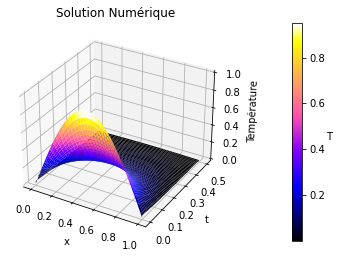

In [3]:
#On crée un graphe 3D
x,y=np.meshgrid(r,t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p=ax.plot_surface(x,y,T,cmap='gnuplot2', linewidth=0)
ax.set_title('Solution Numérique')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('Température')
cbar=fig.colorbar(p,pad=0.2)
cbar.set_label("T",rotation=360)
plt.show()

## Question 2

Pour comparer les solutions analytique et numérique nos avons tracé les courbes pour les deux.

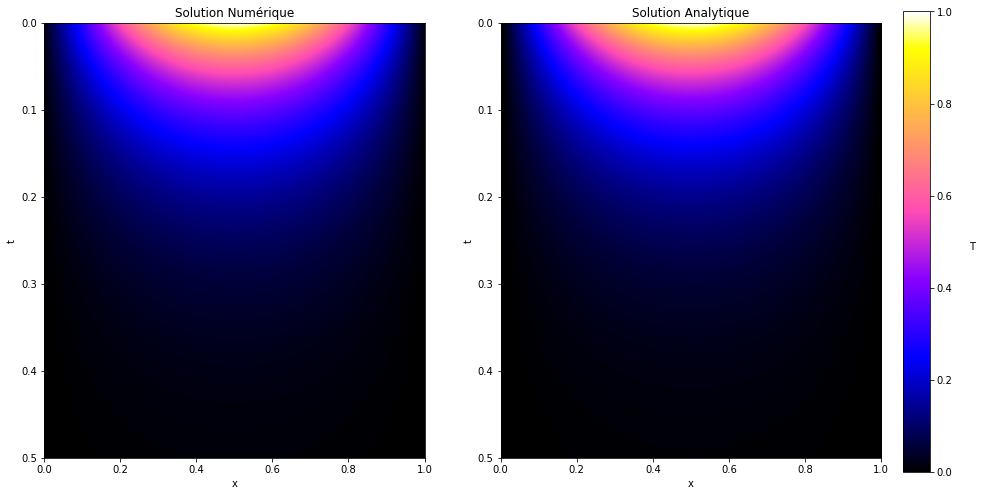

In [4]:
#On crée une liste pour la solution analytique et on l'assigne
TA=[]
Fonction_t0(r,L)
for i in (t):
    TA.append(Fonction_analytique(i,r,L))
T=np.array(T)

#On génére l'image
fig, axs = plt.subplots(1,2,figsize=(15,8))
im1=axs[0].imshow(T,cmap='gnuplot2',aspect='auto',extent=(0,1,0.5,0),interpolation="bicubic");
axs[0].set_title('Solution Numérique')
im2=axs[1].imshow(TA,cmap='gnuplot2',aspect='auto',extent=(0,1,0.5,0),interpolation="bicubic");
axs[1].set_title('Solution Analytique')

plt.setp(axs[0], xlabel='x')
plt.setp(axs[0], ylabel='t')
plt.setp(axs[1], xlabel='x')
plt.setp(axs[1], ylabel='t')
cb_ax = fig.add_axes([0.92, 0.1, 0.025, 0.8])
cbar=fig.colorbar(im2, cax=cb_ax)
cbar.set_label("T", labelpad=20, rotation=360)
plt.show()


On a remarqué une petite différence entre le graphe de la solution analytique et celui de la solution numérique où cette dernière semblait un peu plus ouverte sur les axes de la position que la première. Par conséquent, nous avons tracé la courbe des solutions en fonction de la distance à un temps $nt=1000$.

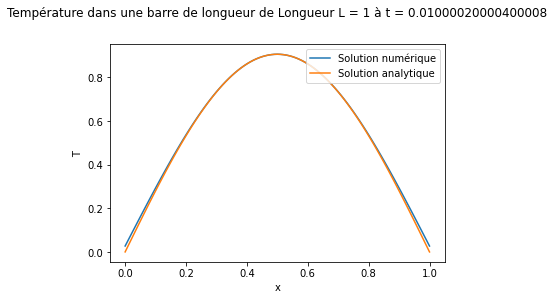

In [5]:
j = 1000
#Traçage courbe
plt.plot(r, T[j], label = 'Solution numérique')
plt.plot(r, Fonction_analytique(j*dt,r, L), label = 'Solution analytique')
plt.title('Température dans une barre de longueur de Longueur L = {} à t = {}'.format(L, t[j]), y=1.1)
plt.xlabel('x')
plt.ylabel('T')
plt.legend(loc = 'upper right')
plt.show()

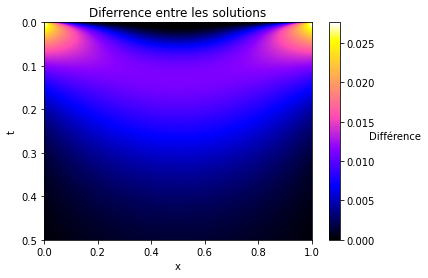

In [6]:
Err=[]
Err=abs(TA-T)
plt.imshow(Err,cmap='gnuplot2',aspect='auto',extent=(0,1,0.5,0),interpolation="bicubic")
cbar=plt.colorbar()
plt.xlabel("x")
plt.ylabel("t")
cbar.set_label("Différence", labelpad=20, rotation=360)
plt.title('Diferrence entre les solutions')
plt.show()

Désormais, nous avons observé que la différence entre les deux solutions était effectivement plus présente sur les bords. Ainsi, nous avons attribué cette divergence à l'expression de la dérivée seconde qui nécessite de deux points pour être définie et, en conséquence, l'erreur augmente sur les bords qui présentent une quantité de points limités. De même, nous nous avons limités à calculer les différences entre les fonctions à cause de la divergence du calcul des erreurs rélatives. De même, le résultat de la barre à prouvé que l'algorythme numérique convergeait à la solution analytique pour la plus grande partie de l'évolution thermique, par conséquent, il est précis de supposer que la résolution numérique des modèles dépourvus de solution analytique sera représentative du comportement réél de la conduction à l'intérieur des corps célestes télluriques.
## Question 3

On pose $T(r, t)=T^j_i$

Le développement de Taylor nous donne :

\begin{equation}
    \left\{\begin{array}{lll}T^j_{i+1}=T^j_i+\delta r \frac{\partial T}{\partial r} + \frac{\delta r^2}{2}\frac{\partial^2 T}{\partial r^2}+O(\delta r^3)\\ T^j_{i-1}=T^j_i-\delta r \frac{\partial T}{\partial r} + \frac{\delta r^2}{2}\frac{\partial^2 T}{\partial r^2}+O(\delta r^3)\end{array}\right.
    \label{e6}
    \tag{13}
\end{equation}

En effectuant une combinaison linéaire des deux équations précedentes, nous obtenons une approximation de la dérivée seconde spatiale de la température :

\begin{equation}
    \frac{\partial^2 T}{\partial r^2}=\frac{T^j_{i+1}-2T^j_i+T^j_{i-1}}{\delta r^2}
    \label{e7}
    \tag{14}
\end{equation}


## Question 4

L'équation de l'évolution thermique pour un corps sphérique s'obtient a partir de l'équation (7), premièrement il est possible de la réécrire sous la forme:

\begin{equation}
\rho C_p\frac{\partial T}{\partial t}=\left(\nabla \kappa\right)\cdot\left(\nabla T\right)+ k \nabla^2T.
\end{equation}

De cette façon, pour un corps homogène i.e. à conductivité constante l'équation devient:

\begin{equation}
\rho C_p\frac{\partial T}{\partial t}=\kappa\nabla^2T,
\end{equation}

et, si le transfert s'effectue que d'une manière radiale, à travers la transformation du Laplacien et une mise en forme de l'équation, nous arrivons a l'expression:


$$\frac{\partial T}{\partial t}=\alpha'\frac{1}{r}\frac{\partial^2 (rT)}{\partial r^2},\quad\alpha'=\frac{\kappa}{\rho C_p}$$

\begin{equation}
    \frac{\partial T}{\partial t}=\alpha' \left(\frac{\partial^2 T}{\partial r^2} + \frac{2}{r}\frac{\partial T}{\partial r}\right)
    \label{e8}
    \tag{15}
\end{equation}

avec
* $T(r, t)$ la température en r et t
* $\kappa$ la conductivité thermique
* $c_p$ capacité calorifique à pression constante
* $\rho$ la masse volumique
* $\alpha'$ la diffusivité thermique

Les conditions de bord pour une planéte sont :

* au centre le flux de chaleur radial est nul $\frac{\partial T(t, r=0)}{\partial r}=0$
* à la surface la température est fixée par $T_{eq}=T_\odot \sqrt{\frac{R_\odot}{2d}}(1-A)^{1/4}$

avec $T_\odot$ la température du Soleil, $R_\odot$ le rayon du Soleil, $d$ la distance du corps au Soleil et $A$ l'albédo.

De la même manière que dans la question 1, nous allons utiliser un schéma de Crank-Nicolson pour résoudre numériquement l'équation \eqref{e8}. De ce fait, on a donc :

\begin{equation}
    \left\{\begin{array}{lll}\frac{\partial T}{\partial t}=\frac{T^{j+1}_i-T^j_i}{\delta t}\\ \frac{\partial T}{\partial r}=\frac{1}{2}\left(\frac{T^j_{i+1}-T^j_{i-1}}{2\delta r}+\frac{T^{j+1}_{i+1}-T^{j+1}_{i-1}}{2\delta r}\right)\\ \frac{\partial^2 T}{\partial r^2}=\frac{1}{2\delta r^2}(T^{j+1}_{i+1}-2T^{j+1}_i+T^{j+1}_{i-1}+T^j_{i+1}-2T^j_i+T^j_{i-1}) \end{array}\right.
    \label{e9}
    \tag{16}
\end{equation}

En utilisant \eqref{e8} et \eqref{e9}, on trouve :

$$-\frac{\alpha'}{2\delta r}\left( \frac{1}{\delta r}+\frac{1}{r}\right)T^{j+1}_{i+1}+\left( \frac{1}{\delta t}+\frac{\alpha'}{\delta r^2}\right)T^{j+1}_i+\frac{\alpha'}{2\delta r}\left( \frac{1}{r}-\frac{1}{\delta r}\right)T^{j+1}_{i-1}=\frac{\alpha'}{2\delta r} \left( \frac{1}{\delta r}+\frac{1}{r}\right) T^j_{i+1}+\left( \frac{1}{\delta t}-\frac{\alpha'}{\delta r^2}\right) T^j_i + \frac{\alpha'}{2 \delta r} \left( \frac{1}{\delta r}-\frac{1}{r} \right) T^j_{i-1}$$

Ainsi, on identifie les expressions des coefficients :

\begin{equation}
    \left\{\begin{array}{lll}a = -\frac{\alpha'}{2\delta r}\left( \frac{1}{\delta r}+\frac{1}{r}\right)\\ b = \left( \frac{1}{\delta t}+\frac{\alpha'}{\delta r^2}\right)\\ c = \frac{\alpha'}{2\delta r}\left( \frac{1}{r}-\frac{1}{\delta r}\right)\\ \alpha = \frac{\alpha'}{2\delta r} \left( \frac{1}{\delta r}+\frac{1}{r}\right)\\ \beta = \left( \frac{1}{\delta t}-\frac{\alpha'}{\delta r^2}\right)\\ \gamma = \frac{\alpha'}{2 \delta r} \left( \frac{1}{\delta r}-\frac{1}{r} \right) \end{array}\right.
    \label{e10}
    \tag{17}
\end{equation}


## Question 5

Avant de calculer la solution à l'équilibre thermique pour un corps homogène sans présence d'éléments radioactifs, il est important de se poser la question sur le choix du pas pour la discrétisation de l'espace et du temps. Le choix du pas $h$ va énormément impacter la validité du résultat numérique. Suivant la valeur du pas, l'erreur d'estimation $f_{analytique}-f_{numérique}$ va être influencée :

* Soit par une erreur systématique de troncature, dans ce cas là l'erreur est déterministe et son origine est liée au nombre fini de termes dans l’estimateur. Par exemple, l'estimateur de la dériver première de $f(x)$ est $f'(x)_{dd}=\frac{f(t+h)-f(t)}{h}$ pour un schéma décentré à droite et le nombre de terme dans cet estimateur est de deux.
* Soit par une erreur d'arrondi, dans ce cas là l'erreur est aléatoire et son origine est liée à la précision de la représentation approximative des flottants en machine et au calcul de la différence faible de deux termes proches.

Sachant que la fonction température $T$ dépend de deux variables qui sont le temps $t$ et la position $r$, nous allons tout d'abord établir une méthode pour estimer le pas $\delta t$ qu'il faut choisir pour la discrétisation du temps puis estimer le pas pour la discrétisation de l'espace $\delta r$ en conséquence.

### Estimation des pas d'intégration

Pour déterminer une solution numérique stable et cohérente avec la physique du problème, il est important de déterminer les bons pas d'intégration sur l'espace et le temps. Pour se faire, nous allons utiliser la stabilité de Von Neumann. En analyse numérique, l'analyse de stabilité de von Neumann est un procédé permettant de vérifier la stabilité numérique de schémas utilisant la méthode des différences finies pour des équations aux dérivées partielles. 
Elle est basée sur la décomposition de l'erreur en séries de Fourier.

La discrétisation de l'équation (15) donne :

\begin{equation}
    T^{j+1}_i=T^j_i+\frac{\alpha ' \delta t}{\delta r^2}(T^j_{i+1}-2T^j_i+T^j_{i-1})+\frac{\alpha ' \delta t}{r \delta r}(T^j_{i+1}-T^j_{i-1})
    \label{e14}
    \tag{20}
\end{equation}

On définie l'erreur d'arrondi $\epsilon^j_i$ par :

$$\epsilon^j_i=F^j_i-T^j_i$$

où $T^j_i$ est la solution de l'équation discrétisée qui serait implémentée en l'absence d'erreurs d'arrondi, et $F^j_i$ est la solution numérique obtenue par précision arithmétique finie. Comme la solution exacte $T^j_i$ doit vérifier la solution discrétisée, l'erreur $\epsilon^j_i$ doit elle aussi vérifier l'équation discrétisée. Ainsi :

\begin{equation}
    \epsilon^{j+1}_i=\epsilon^j_i+\frac{\alpha ' \delta t}{\delta r^2}(\epsilon^j_{i+1}-2\epsilon^j_i+\epsilon^j_{i-1})+\frac{\alpha ' \delta t}{r \delta r}(\epsilon^j_{i+1}-\epsilon^j_{i-1})
    \label{e15}
    \tag{21}
\end{equation}

est une relation de récurrence pour l'erreur. Les équations (1) et (2) montrent que l'erreur et la solution numérique ont le même comportement en fonction du temps. La variation spatiale de l'erreur peut être décomposée en une série de Fourier finie sur l'intervalle $R$, par

$$\epsilon (r) = \sum_{m=1}^M A_me^{ik_mr}$$

où $k_m=\frac{\pi m}{R}$ avec $m=1,2,\cdots,M$ et $M=R/\delta r$. La dépendance du temps de l'erreur est incluse an supposant que l'amplitude de l'erreur $A_m$ est une fonction du temps. Sachant que l'erreur tend à croître ou décroître de manière exponentielle avec le temps, il est raisonnable de supposer que l'amplitude varie exponentiellement avec le temps ; d'où

$$\epsilon (r, t) = \sum_{m=1}^M e^{at}e^{ik_mr}$$

avec $a$ une constante.

Comme l'équation des différences de l'erreur est linéaire, il est suffisant de considérer la croissance de l'erreur pour un terme choisi :

$$\epsilon (r, t) = e^{at}e^{ik_mr}$$

Les caractéristiques de stabilité peuvent être étudiées en utilisant cette forme de l'erreur, sans perte de généralité. On note que :

\begin{equation}
    \left\{\begin{array}{lll}\epsilon^j_i= e^{at}e^{ik_mr}\\ \epsilon^{j+1}_i= e^{a(t+\delta t)}e^{ik_mr}\\ \epsilon^{j}_{i+1}= e^{at}e^{ik_m(r+\delta r)}\\ \epsilon^{j}_{i-1}= e^{at}e^{ik_m(r-\delta r)}\end{array}\right.
\end{equation}

Ainsi,

$$e^{a\delta t} = 1+\frac{4\alpha '\delta t}{\delta r^2}\left(e^{ik_m\delta r}+e^{-ik_m\delta r}-2\right) + \frac{\alpha ' \delta t}{r \delta r}\left(e^{ik_m\delta r}-e^{-ik_m\delta r}\right)$$

$$e^{a\delta t} = 1-\frac{4\alpha '\delta t}{\delta r^2}\sin^2(k_m\delta r/2) + i2\frac{\alpha ' \delta t}{r \delta r}\sin(k_m \delta r)$$

On définie le facteur d'amplitude :

$$G=\frac{\epsilon^{j+1}_i}{\epsilon^j_i}=e^{a\delta t}$$

La condition nécessaire et suffisante pour que l'erreur reste borné est $|G|\leq 1$. On a donc :

$$\left|1-\frac{4\alpha '\delta t}{\delta r^2}\sin^2(k_m\delta r/2) + i2\frac{\alpha ' \delta t}{r \delta r}\sin(k_m \delta r)\right|\leq 1$$

$$\Longleftrightarrow\sqrt{\left(1-\frac{4\alpha '\delta t}{\delta r^2}\sin^2(k_m\delta r/2)\right)^2+4\left(\frac{\alpha ' \delta t}{r \delta r}\sin(k_m \delta r)\right)^2}\leq 1$$

Afin que la condition ci-dessus soit vraie pour tout $k_m$, il faut :

\begin{equation}
    \frac{\alpha ' \delta t}{\delta r^2} \leq \frac{1}{2}\quad \hbox{ et }\quad 2\delta r \leq r
    \label{e16}
    \tag{22}
\end{equation}

L'equation \eqref{e16} donne la condition de stabilité pour la résolution du schéma. Cependant $\delta t$ doit être choisi correctement afin de maximiser l'intervalle $r\in [R_{min}, R_{max}]$ avec $0<R_{min}$.

Un autre moyen d'estimer le pas sur $\delta t$ est d'utiliser la condition de courant de Friedrichs-Lewy. Cette condition s’interprète comme le fait que le pas de temps doit être plus petit que le temps de diffusion de notre système. En effet si on prend un pas de temps $\delta t$ trop grand, alors les informations au point spatial $i$ et au pas de temps $j$ seront parvenus plus loin que le pas spatial $i ± 1$ au pas de temps $j + 1$. Il y aura alors un perte d’information qui rendra le schéma instable. Une vitesse caractéristique du système est $\frac{\alpha '}{R}$ avec $R$ le rayon de la planète. Ainsi, on en déduit $\delta r \frac{R}{\alpha '} > \delta t$.

### Résolution dans le cas de la lune homogène

Nous allons calculer la solution à l'équilibre thermique pour la lune homogène sans présence d'éléments radioactifs.

Les valeurs des paramètres physiques pour la Lune (homogène) sont :

| Nom               | Symbole    | Valeur           | Unité                               |
|----------------   |---------------- |----------------	|------------------------------------	|
| Conductivité thermique de la la Lune | $\kappa_{i}$ | 4.19504 | W / (m K)	|
| Température de surface | $T_s$ | 273 | K	|
| Température initiale | $T_0$ | 100 | K	|
| Capacité calorifique | $c_p$ | 1256 | J / (kg K)	|
| Densité de la Lune | $\rho$ | 3340 | kg / m$^3$	|
| Rayon de la Lune | $R$ | 1738 | km 	|

On estime que la lune s'est formé il y a 4,51 milliards d'années avec l'hypothèse qu'à l'instant initial la lune était un océan de magma avec une température identique le long du rayon de la lune. Le calcul de $T_{eq}$ pour la lune donne $T_{eq} \approx 270$ K. De plus, on fait l'hypothèse que la température dans le noyau de la lune est partout la même. On approxime le rayon du noyau à 200 km. L'intervalle d'integration sur l'espace est donc $r\in[200, R_L]$ km.
Le temps caractéristique du système est donné par $\tau = \frac{R_L^2}{\alpha'} \simeq 96$ milliard d'années. Ainsi, la vitesse caractéristique du système est $\simeq 18$ km/milliard d'années. De ce fait, à partir des conditions de stabilité établie précédemment, on en déduit $\delta t = 10^{-4}$ milliard d'années et $\delta r = 10$ km.

### Mise en équation

D'après les conditions initiales :

**Pour le noyaux :**

$$\frac{\partial T(t, r = 0)}{\partial r}=\frac{T^j_{1}-T^j_{-1}}{\delta r} = 0$$

$$\Leftrightarrow T^j_{1}=T^j_{-1}$$

Par changement d'indice sur $j$, on obtient de la même façon $T^{j+1}_{1}=T^{j+1}_{-1}$.

$$\Longrightarrow \left( a + c \right)T^{j+1}_{1} + b T^{j+1}_0 = \left( \alpha + \gamma \right)T^j_{1} + \beta T^j_0$$

**Pour la surface :**

L'atmosphère fixe la température à la surface de la planète pout tout $t$ par $T_{N+1} = T_{eq}$ avec $N$ le nombre de couche la planète. On en déduit :

$$b T^{j+1}_N + c T^{j+1}_{N-1} = \beta T^j_N + \gamma T^j_{N-1} + (\alpha - a) T_{eq}$$

$$\Longrightarrow A = \left(\begin{array}{ccccccc}
b&a+c&0&\cdots&0\\
c&b&a&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&c&b&a\\
0&\cdots&0&c&b
\end{array}\right)
\quad B = \left(\begin{array}{ccccccc}
\beta&\alpha+\gamma&0&\cdots&0\\
\gamma&\beta&\alpha&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&\gamma&\beta&\alpha\\
0&\cdots&0&\gamma&\beta
\end{array}\right)
\quad K = \left(\begin{array}{c}
0\\
\vdots\\
0\\
\vdots\\
T_{eq}(\alpha-a)\end{array}\right)$$

Finalement, l'équation à résoudre pour trouver la solution à l'équilibre thermique d'un corps homogène sans présence d'éléments radioactifs est :

\begin{equation}
    T^{j+1}=A^{-1}BT^j+A^{-1}K
    \label{e17}
    \tag{23}
\end{equation}


In [7]:
#Constantes usuelles en SI
Tsoleil = 5778
G = 6.67408e-11
UA = 149597870700
Rsoleil = 6.957e8
GM = 1.3271244e20
def T0(r, R):
    return 1100+(1-r/R)**2*900

In [8]:
#Conversion milliard d'année en seconde
milan_to_sec = lambda x : x*3.1536e+16
#Conversion m2 en km2
m2_to_km2 = lambda x : x*1e-6
#Température d'équilibre
Teq_build = lambda d, A : Tsoleil*np.sqrt(Rsoleil/(2*d*UA))*(1-A)**(1/4) # calcul de la température d'équilibre

#Définition des paramètres pour la lune
Teq_lune = 370
kappa, rho, cp = 4.19504, 3340, 1256
alpha_prim = milan_to_sec(m2_to_km2(kappa/(rho*cp))) # en km^2/milliar d'années
RL = 1738 # Rayon de la lune en km

#Discrétisation de l'espace/temps (on construit les vecteurs temps "t" et position "r")
tmax = 10 # en milliard d'année
dt = 0.0001 # en milliard d'année
dr = 10 # en km

#Construction des intervalles d'intégration
r, nr = discretisation_r(200, RL, dr)
t, nt = discretisation_t(tmax, dt)
print("La taille du vecteur r est %s"%nr)
print("La taille du vecteur t est %s"%nt)

#Construction tridiagonale: On définit les coefficients:
a = -alpha_prim/(2*dr)*(1/(dr)+1/r)
b = 1/dt+alpha_prim/(dr)**2
c = alpha_prim/(2*dr)*(1/r-1/(dr))
alpha = -a
beta = 1/dt-alpha_prim/(dr)**2
gamma = -c

#Construction de la matrice A, B et du vecteur K
A, B, K = constructeur(a,b,c,alpha,beta,gamma,nr)
#Construction de l'équation pour la résolution
A_inv = np.linalg.inv(A)
A_invB = A_inv.dot(B)
A_invK = A_inv.dot(K)

#Calcul des vecteurs Température aprés un dt
T_sans_rad = []

for j in range(nt):
    if j == 0:
        T_sans_rad += [T0(r,RL)*nr]
    else:
        T_sans_rad += [A_invB.dot(T_sans_rad[j-1])+A_invK]
    if j%500 == 0:
        print(j, end = ' ')

La taille du vecteur r est 174
La taille du vecteur t est 100001
0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 50500 51000 51500 52000 52500 53000 53500 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500 60000 60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500 66000 66500 67000 67500 68000 68500 69000 69500 70000 70500 71000 71500 72000 72500 73000 73500 74000 74500 75000 75500 76000 76500 77000 77500 78000 78500 79000 79500

In [9]:
#def Fonction_t0(r, R):
#    return 1100+(1-r/R)**2*900

[235680.02456593 235664.70030054 235621.52367712 235552.81911497
 235460.53201774 235346.30050147 235211.51143533 235057.34463452
 234884.80801085 234694.76575424 234487.96109425 234265.03481053
 234026.54038277 233772.95646434 233504.69720979 233222.12087027
 232925.5369823  232615.21240794 232291.37643183 231954.22507993
 231603.9247931  231240.61556332 230864.41362069 230475.41374341
 230073.69125007 229659.30372363 229232.29250797 228792.68401125
 228340.49084459 227875.71282052 227398.33783135 226908.34262487
 226405.69349228 225890.34688081 225362.24994189 224821.34102432
 224267.55012035 223700.79927176 223121.00294194 222528.06835938
 221921.89583702 221302.37907169 220669.40542718 220022.85620401
 219362.60689874 218688.52745527 218000.48251038 217298.33163527
 216581.92957504 215851.12648747 215105.76818255 214345.69636393
 213570.74887339 212780.75993927 211975.56042964 211154.97811113
 210318.83791376 209466.96220267 208599.17105696 207715.28255621
 206815.1130749  205898.4

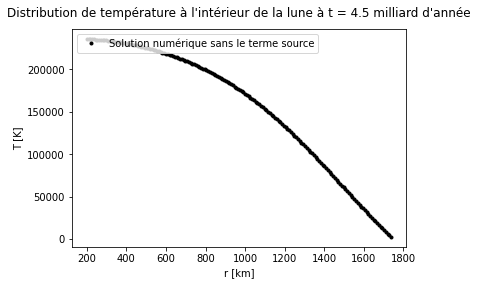

In [10]:
j = 45000
print(T_sans_rad[j])
fig = plt.figure()
plt.plot(r, T_sans_rad[j], '.k', label = 'Solution numérique sans le terme source')
plt.title("Distribution de température à l'intérieur de la lune à t = {} milliard d'année".format(round(t[j], 5)), y=1.03)
plt.xlabel('r [km]')
plt.ylabel('T [K]')
plt.legend(loc = 'upper left')
plt.show()

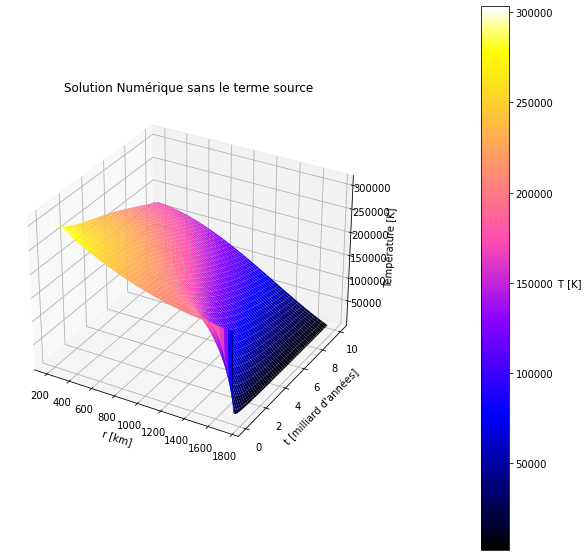

In [11]:
T_sans_rad = np.array(T_sans_rad)
#On crée un graphe 3D
fig = plt.figure(figsize=(10,10))
x,y=np.meshgrid(r,t)
ax = fig.add_subplot(111, projection='3d')
p=ax.plot_surface(x,y,T_sans_rad,cmap='gnuplot2', linewidth=0)
ax.set_title('Solution Numérique sans le terme source')
ax.set_xlabel('r [km]')
ax.set_ylabel("t [milliard d'années]")
ax.set_zlabel('Température [K]')
cbar=fig.colorbar(p,pad=0.2)
cbar.set_label("        T [K]",rotation=360)
plt.show()

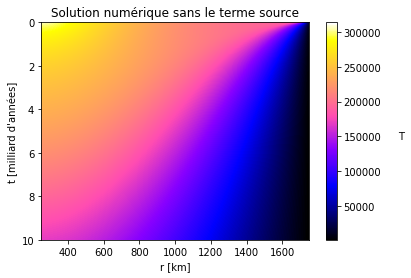

In [12]:
#Nous générons une image de la solution
plt.imshow(T_sans_rad, cmap='gnuplot2', aspect='auto',extent=(250,1750,10,0),interpolation="bicubic")
cbar=plt.colorbar()
plt.xlabel("r [km]")
plt.ylabel("t [milliard d'années]")
cbar.set_label("T", labelpad=20, rotation=360)
plt.title('Solution numérique sans le terme source')
plt.show()

## Question 6

En prenant en compte un terme source relié à la présence d'éléments radioactifs dans le corps, l'équation de l'évolution thermique (15) devient :

\begin{equation}
    \frac{\partial T}{\partial t}=\frac{\kappa}{\rho C_p}\frac{1}{r}\frac{\partial^2 (rT)}{\partial r^2}+\frac{H(t)}{c_p}
    \label{e9}
    \tag{24}
\end{equation}

où $H(t)=\sum_{n=1}^N C(n)H_n e^{-t\ln(2)/\tau_{rad}}$

avec

* $H$ la chaleur libérée par la désintégration de chaque isotope par unité de masse
* $C$ la fraction de masse initiale de chaque élément radiogénique en partie par milliard
* $\tau_{rad}$ le temps de demi-vie de décroissance

L'équation matricielle devient donc :

$$T^{j+1}=A^{-1}BT^j+A^{-1}S+A^{-1}K$$

avec $S$ qui représente le vecteur terme source.

Les données du problème sont :

| Isotope           | $C$ $(ppb)$       |  $H$ ( J kg$^{-1}$)                   | $\tau_{rad}$ (années)       |
|----------------   |----------------	|------------------------------------	|--------------------------   |
| $^{235}$U         | 5.4               | 568.7 10$^{-6}$                       | 7.08 10$^{8}$               | 
| $^{238}$U         | 19.9              | 94.6510$^{-6}$                        | 4.47 10$^{9}$               |
| $^{40}$K          | 737.9             | 29.17 10$^{-6}$                       |  1.28 10$^{9}$              |
| $^{232}$Th        | 38.7              | 26.38 10$^{-6}$                       |  1.40 10$^{10}$             |
| $^{26}$Al         | 600               |  0.355                                |  7.16 10$^{5}$              |
| $^{60}$Fe         | 100               |  7.0 10$^{-2}$                        |  1.5 10$^{6}$               |
| $^{53}$Mn         | 25.7              |  2.7 10$^{-2}$                        |   3.7 10$^{6}$              |

In [13]:
#isotope = [C(ppb), H(J Kg-1), tau_rad(années)]
U235 = [5.4, 568.7e-6, 7.08e8]
U238 = [19.9, 94.65e-6, 4.47e9]
K40 = [737.9, 29.17e-6, 1.28e9]
Th232 = [38.7, 26.38e-6, 1.40e10]
Al60 = [600, 0.355, 7.16e5]
Fe60 = [100, 7.0e-2, 1.5e6]
Mn53 = [25.7, 2.7e-2, 3.7e6]

element = [U235, U238, K40, Th232, Al60, Fe60, Mn53]

In [15]:
T0=100
#Calcul du terme source relié à la présence d'éléments radioactifs dans le corps
def H_fonction(x, t): 
    return x[0]*x[1]*np.exp(-t*np.log(2)/x[2])

H_tot = 0
for i in element:
    H_tot += H_fonction(i, t*1e9)

#Construction du vecteur S
S = []
for i in H_tot:
    S += [[i]*nr]
S=np.array(S)/cp

#Construction de l'équation pour la résolution en prenant en compte les éléments radioactifs dans le corps
#Construction de A_inv . S
A_invS = []
for i in S:
    A_invS += [A_inv.dot(i)]

#Calcul des vecteurs Température aprés un dt
T_rad = []

for j in range(nt):
    if j == 0:
        T_rad += [[T0]*nr]
    else:
        T_rad += [A_invB.dot(T_rad[j-1]) + A_invK + A_invS[j]]
    if j%500 == 0:
        print(j, end = ' ')

0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 50500 51000 51500 52000 52500 53000 53500 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500 60000 60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500 66000 66500 67000 67500 68000 68500 69000 69500 70000 70500 71000 71500 72000 72500 73000 73500 74000 74500 75000 75500 76000 76500 77000 77500 78000 78500 79000 79500 80000 80500 81000 81500 82000 82500 83000 83500 84000 84500 8500

[103.75328051 103.76034592 103.78026671 103.81200878 103.85473284
 103.90775829 103.97053514 104.04262178 104.12366743 104.2133979
 104.3116043  104.41813369 104.53288154 104.65578548 104.78682011
 104.92599275 105.07333982 105.2289238  105.39283072 105.56516796
 105.74606242 105.93565896 106.134119   106.34161939 106.55835136
 106.78451965 107.02034173 107.26604711 107.52187673 107.78808243
 108.06492641 108.35268087 108.65162752 108.96205726 109.28426979
 109.61857334 109.96528428 110.32472689 110.69723305 111.08314192
 111.48279973 111.89655946 112.32478056 112.76782872 113.22607553
 113.69989823 114.18967944 114.69580681 115.21867276 115.75867415
 116.31621196 116.89169096 117.48551935 118.09810843 118.72987224
 119.38122713 120.05259144 120.74438504 121.45702894 122.19094487
 122.9465548  123.72428053 124.5245432  125.34776281 126.19435771
 127.06474412 127.95933562 128.87854257 129.82277161 130.79242508
 131.78790048 132.80958987 133.85787929 134.93314817 136.03576872
 137.166105

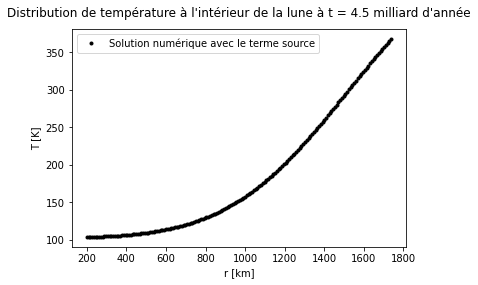

In [16]:
j = 45000
print(T_rad[j])
fig = plt.figure()
plt.plot(r, T_rad[j], '.k', label = 'Solution numérique avec le terme source')
plt.title("Distribution de température à l'intérieur de la lune à t = {} milliard d'année".format(round(t[j], 5)), y=1.03)
plt.xlabel('r [km]')
plt.ylabel('T [K]')
plt.legend(loc = 'upper left')
plt.show()

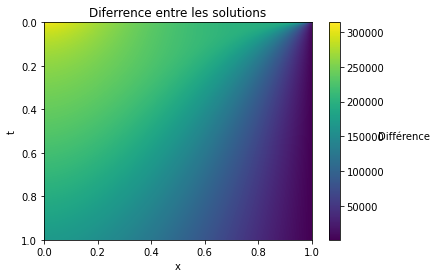

In [17]:
Err=[]
Err=abs(T_rad-T_sans_rad)
plt.imshow(Err,cmap='viridis',aspect='auto',extent=(0,1,1,0),interpolation="bicubic")
cbar=plt.colorbar()
plt.xlabel("x")
plt.ylabel("t")
cbar.set_label("Différence", labelpad=20, rotation=360)
plt.title('Diferrence entre les solutions')
plt.show()

## Question 7

Nous allons maintenant calculer la température attendue dans les objets transneptuniens (TNO). On garde l'hypothèse d'un corps sphérique mais on ne le considère plus comme une couche homogène. Cette fois ci, on suppose que les TNO ont une composition en deux couches avec un manteau composé de glace et un noyau composé de silicate. Ainsi, la nouvelle équation à résoudre pour une TNO est :

\begin{equation}
    \frac{\partial T}{\partial t}=\frac{\kappa}{\rho C_p}\frac{1}{r}\frac{\partial^2 (rT)}{\partial r^2}+\frac{1}{\rho c_p}\frac{\partial \kappa}{\partial r}\frac{\partial T}{\partial r}+\frac{H(t)}{c_p}
    \label{e10}
    \tag{25}
\end{equation}

en prenant en compte le terme source.

À partir de la densité moyenne de la TNO, on peut estimer les rayons du noyau et du manteau par la conservation de la masse :

$$\rho_{moyen}R_{corps}^3=\rho_{noyau}R^3_{noyau}+\rho_{manteau}(R_{corps}^3-R_{noyau}^3)$$

$$\Longleftrightarrow R_{noyau}^3=R_{corps}^3\frac{\rho_{moyen}-\rho_{manteau}}{\rho_{noyau}-\rho_{manteau}}$$

avec $R_{corps} = R_{manteau} + R_{noyau}$.

Ainsi, on a pour $r\in[R_{min}, R_{corps}]$ :

$$\left\{\begin{array}{lll} \rho(r)=\rho_{silicate} \quad \hbox{si $R_{min}\leq r \leq R_{noyau}$} \\ \rho(r)=\rho_{glace} \quad\hbox{si $R_{noyau} < r \leq R_{corps}$} \end{array}\right. \quad \hbox{ et } \quad \left\{\begin{array}{lll} \kappa(r)=\kappa_{silicate} \quad\hbox{si $R_{min}\leq r \leq R_{noyau}$} \\ \kappa(r)=\kappa_{glace} \quad\hbox{si $R_{noyau} < r \leq R_{corps}$} \end{array}\right.$$

On garde les mêmes conditions de bord pour la surface et au centre. Cependant une nouvelle condition aux limites apparait. En effet, l'équation \eqref{e10} est différente suivant la couche et le flux de chaleur à la transition doit être le même des deux cotés afin d'assurer la continuité et la dérivabilité de la fonction $T$. Du fait de la dependance en $r$ des coefficients (17), les matrices $A$ et $B$ auront dans leur partie supérieur les coefficient lié pour le noyau et dans leur partie inférieur les coefficient lié à celui du manteau. Le changement des coefficient des un par rapport aux autres est repéré par $R_{noyau}$.

$$\Longrightarrow A = \left(\begin{array}{ccccccc}
b_{noyau}&a_{noyau}+c_{noyau}&0&\cdots&0\\
c_{noyau}&b_{noyau}&a_{noyau}&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&c_{manteau}&b_{manteau}&a_{manteau}\\
0&\cdots&0&c_{manteau}&b_{manteau}
\end{array}\right)
\quad B = \left(\begin{array}{ccccccc}
\beta_{noyau}&\alpha_{noyau}+\gamma_{noyau}&0&\cdots&0\\
\gamma_{noyau}&\beta_{noyau}&\alpha_{noyau}&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&\gamma_{manteau}&\beta_{manteau}&\alpha_{manteau}\\
0&\cdots&0&\gamma_{manteau}&\beta_{manteau}
\end{array}\right)
\quad K = \left(\begin{array}{c}
0\\
\vdots\\
0\\
\vdots\\
T_{eq}(\alpha_{manteau}-a_{manteau})\end{array}\right)$$

Finalement, on résoud :

$$T^{j+1}=A^{-1}BT^j+A^{-1}S+A^{-1}K$$

Les valeurs des paramètres physiques (conductivité, densité, etc.) des TNOs sont listés dans cette table issue de Bierson et Nimmo (2019).

| Nom               | Symbole    | Valeur           | Unité                               |
|----------------   |---------------- |----------------	|------------------------------------	|
| Conductivité thermique de la glace | $\kappa_{i}$ | 0.4685 + 488.12 / T | W / (m K)	|
| Conductivité thermique des silicates | $\kappa_{s}$ | 3.0 | W / (m K)	|
| Température de surface | $T_s$ | 40 | K	|
| Température initiale | $T_0$ | 100 | K	|
| Capacité calorifique | $c_p$ | 1000 | J / (kg K)	|
| Densité de la glace | $\rho_i$ | 920 | kg / m$^3$	|
| Densité des silicates | $\rho_s$ | 3500 | kg / m$^3$	|

### Résolution pour Quaoar

Quaoar est un objet massif de la ceinture de Kuiper découvert en 2002. De la même manière que précédemment on fait l'hyphotèse qu'à l'instant initial de la formation de Quaonar, on a un océan de magma où la température est partout homogène à $T_0 = 100$ K. Sa densité moyenne et son rayon sont respectivement $2180$ kg/m$^3$ et $R_Q = 1070$ km. On trouve $R_{noyau}=843$ km et $R_{manteau}=227$ km. On fait l'hypothèse que la température est homogène dans l'intervalle $[0, 50]$ km $\Rightarrow$ l'intervalle d'integration sur l'espace est $r\in[50, R_Q]$ km. On garde les mêmes pas d'intégration que précédemment.


In [18]:
#Paramètres TNO
cp = 1000
#Couche glace
kappa_glace, rho_glace = 0.4685, 920
#Couche silicates
kappa_silicium, rho_silicium = 3, 3500

In [27]:
#Définition des paramètres pour Quaoar
Teq_Quaoar = Teq_build(43.25, 0)
alpha_prim_n = milan_to_sec(m2_to_km2(kappa_silicium/(rho_silicium*cp))) # pour le noyau en km^2/milliar d'années
alpha_prim_m = milan_to_sec(m2_to_km2(kappa_glace/(rho_glace*cp))) # pour le manteau en km^2/milliar d'années
RQ = 1070 # Rayon de la lune en km
Rn = 843 # Rayon du noyau en km
Rm = 227 # Rayon du manteau en km
dr, dt = 2, 1e-4
tmax = 5 # en milliard d'année

#Construction des intervalles d'intégration
r, nr = discretisation_r(10, RQ, dr)
t, nt = discretisation_t(tmax, dt)

#Trouver le point de transition
for i in range (nr):
    if r[i] >= Rn:
        inter = i
        break
    
print(alpha_prim_n, alpha_prim_m)

#Construction tridiagonale: On définit les coefficients:
#Pour le noyau
a_n = -alpha_prim_n/(2*dr)*(1/(dr)+1/r)
b_n = 1/dt+alpha_prim_n/(dr)**2
c_n = alpha_prim_n/(2*dr)*(1/r-1/(dr))
alpha_n = -a_n
beta_n = 1/dt-alpha_prim_n/(dr)**2
gamma_n = -c_n

#pour le manteau
a_m = -alpha_prim_m/(2*dr)*(1/(dr)+1/r)
b_m = 1/dt+alpha_prim_m/(dr)**2
c_m = alpha_prim_m/(2*dr)*(1/r-1/(dr))
alpha_m = -a_m
beta_m = 1/dt-alpha_prim_m/(dr)**2
gamma_m = -c_m

print(a_m)

#Construction de la matrice A, B et du vecteur K
A, B, K = [], [], [0]*(nr-1)+[Teq_Quaoar*2*alpha_m[nr-1]]
for i in range(nr):
    if i == 0:
        A += [[b_n, a_n[i] + c_n[i]] + [0]*(nr - 2)]
        B += [[beta_n, alpha_n[i] + gamma_n[i]] + [0]*(nr - 2)]
    elif i == nr-1:
        A += [[0]*(nr - 2) + [c_m[i], b_m]]
        B += [[0]*(nr - 2) + [gamma_m[i], beta_m]]
    elif i <= inter:
        A += [[0]*(i-1) + [c_n[i], b_n, a_n[i]] + [0]*(nr - 2 - i)]
        B += [[0]*(i-1) + [gamma_n[i], beta_n, alpha_n[i]] + [0]*(nr - 2 - i)]
    elif i > inter:
        A += [[0]*(i-1) + [c_m[i], b_m, a_m[i]] + [0]*(nr - 2 - i)]
        B += [[0]*(i-1) + [gamma_m[i], beta_m, alpha_m[i]] + [0]*(nr - 2 - i)]
    if i%500 == 0:
        print(i, end = ' ')   
        
#Construction de l'équation pour la résolution
A_inv = np.linalg.inv(A)
A_invB = A_inv.dot(B)
A_invK = A_inv.dot(K)
S, A_invS, H_tot, S = [], [], 0, []
for i in element:
    H_tot += H_fonction(i, t*1e9)
for i in H_tot:
    S += [[i]*nr]
for i in S:
    A_invS += [A_inv.dot(i)]

#Calcul des vecteurs Température aprés un dt
T_Quaoar = []

for j in range(nt):
    if j == 0:
        T_Quaoar += [[T0]*nr]
    else:
        T_Quaoar += [A_invB.dot(T_Quaoar[j-1]) + A_invK + A_invS[j]]
    if j%500 == 0:
        print(j, end = ' ')
        
##############Sans source######################
T_sans = []
for j in range(nt):
    if j == 0:
        T_sans += [[T0]*nr]
    else:
        T_sans += [A_invB.dot(T_sans[j-1]) + A_invK]
    if j%500 == 0:
        print(j, end = ' ')

27030.85714285714 16059.365217391303
[-2408.90478261 -2342.40897351 -2294.81009675 -2259.05507195
 -2231.2124326  -2208.91738681 -2190.66212709 -2175.4398729
 -2162.55272573 -2151.5016506  -2141.92035459 -2133.53390256
 -2126.13190669 -2119.55063421 -2113.66075408 -2108.35875276
 -2103.56079821 -2099.19827446 -2095.21447922 -2091.56214576
 -2088.2015586  -2085.0991035  -2082.22613914 -2079.55811033
 -2077.07384439 -2074.75498812 -2072.58555359 -2070.55154901
 -2068.64067663 -2066.8420839  -2065.1461572  -2063.54434999
 -2062.02903874 -2060.59340159 -2059.2313157  -2057.93726991
 -2056.70629025 -2055.53387606 -2054.41594495 -2053.34878535
 -2052.32901532 -2051.35354677 -2050.41955423 -2049.52444747
 -2048.66584757 -2047.84156576 -2047.04958483 -2046.28804261
 -2045.55521739 -2044.84951489 -2044.16945671 -2043.51366996
 -2042.88087805 -2042.26989236 -2041.67960482 -2041.10898116
 -2040.5570549  -2040.02292189 -2039.50573533 -2039.00470133
 -2038.51907481 -2038.04815584 -2037.59128624 -20

0 500 0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 3600

[84.99100029 84.99045031 84.98911498 84.98715191 84.98464874 84.98165808
 84.97821344 84.97433713 84.97004463 84.96534696 84.96025222 84.9547665
 84.94889443 84.94263963 84.93600494 84.92899266 84.92160464 84.91384239
 84.90570716 84.89720001 84.88832181 84.87907331 84.86945515 84.85946788
 84.84911198 84.83838787 84.8272959  84.8158364  84.80400966 84.79181592
 84.77925542 84.76632835 84.75303492 84.73937528 84.72534958 84.71095798
 84.6962006  84.68107756 84.66558898 84.64973496 84.6335156  84.616931
 84.59998125 84.58266642 84.56498661 84.54694189 84.52853234 84.50975802
 84.49061902 84.4711154  84.45124724 84.43101459 84.41041753 84.38945611
 84.36813042 84.3464405  84.32438644 84.30196828 84.2791861  84.25603997
 84.23252994 84.20865608 84.18441846 84.15981716 84.13485223 84.10952374
 84.08383177 84.05777638 84.03135765 84.00457566 83.97743047 83.94992216
 83.92205081 83.8938165  83.8652193  83.8362593  83.80693659 83.77725124
 83.74720334 83.71679299 83.68602027 83.65488528 83.62

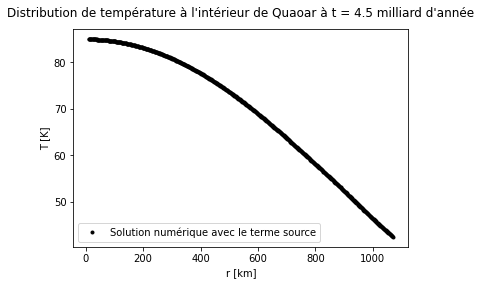

In [29]:
j = 45000
print(T_Quaoar[j])
fig = plt.figure()
plt.plot(r, T_Quaoar[j], '.k', label = 'Solution numérique avec le terme source')
plt.title("Distribution de température à l'intérieur de Quaoar à t = {} milliard d'année".format(round(t[j], 5)), y=1.03)
plt.xlabel('r [km]')
plt.ylabel('T [K]')
plt.legend(loc = 'lower left')
plt.show()

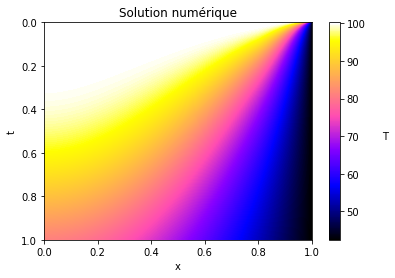

In [30]:
T_Quaoar = np.array(T_Quaoar)
#Nous générons une image de la solution
fig = plt.figure()
plt.imshow(T_Quaoar,cmap='gnuplot2',aspect='auto',extent=(0,1,1,0),interpolation="bicubic")
cbar=plt.colorbar()
plt.xlabel("x")
plt.ylabel("t")
cbar.set_label("T", labelpad=20, rotation=360)
plt.title('Solution numérique')
plt.show()

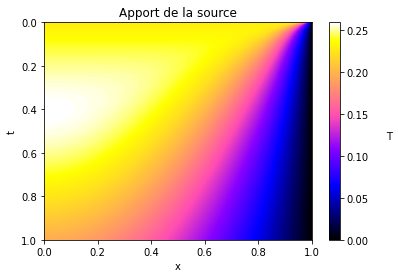

In [31]:
T_Quaoar = np.array(T_Quaoar)
#Nous générons une image de la solution
Err=T_Quaoar-T_sans
fig = plt.figure()
plt.imshow(Err,cmap='gnuplot2',aspect='auto',extent=(0,1,1,0),interpolation="bicubic")
cbar=plt.colorbar()
plt.xlabel("x")
plt.ylabel("t")
cbar.set_label("T", labelpad=20, rotation=360)
plt.title('Apport de la source')
plt.show()